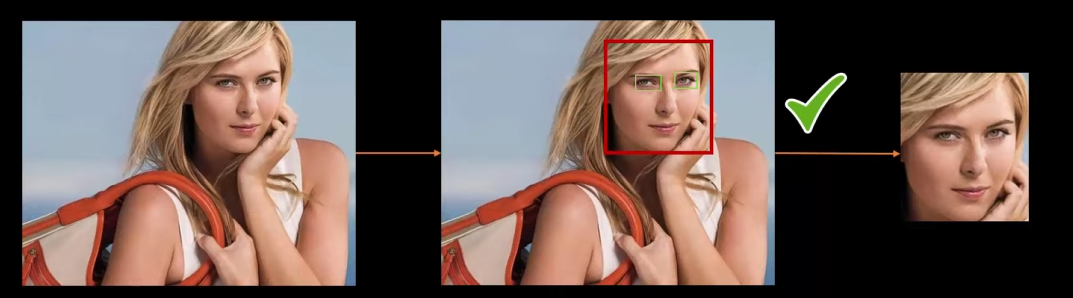

## there should be a face and 2wo eyes init

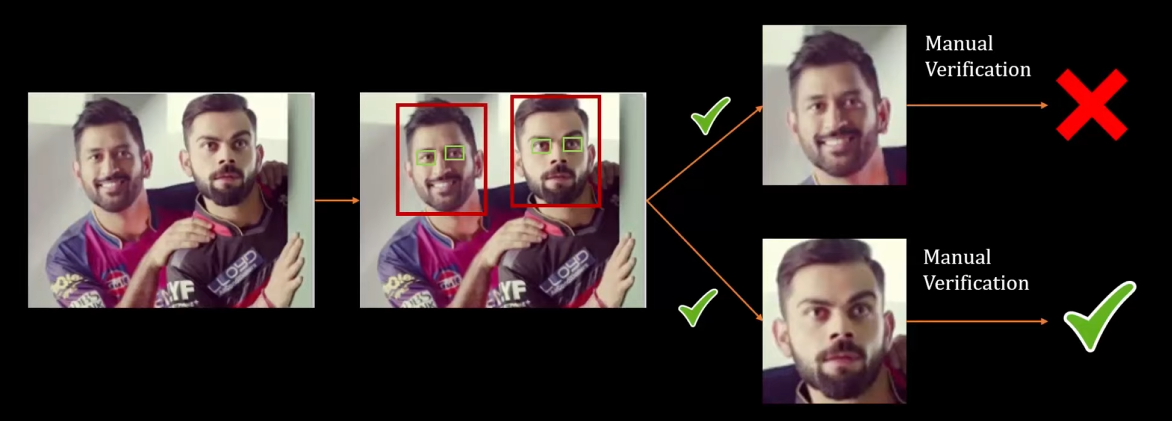

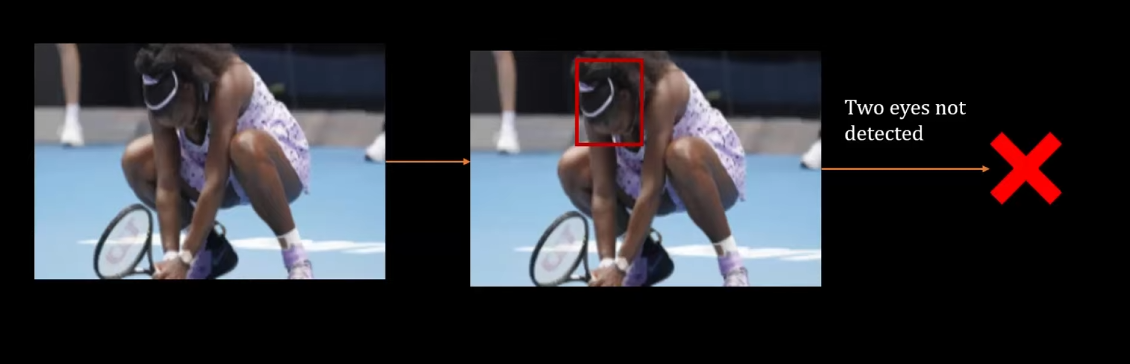

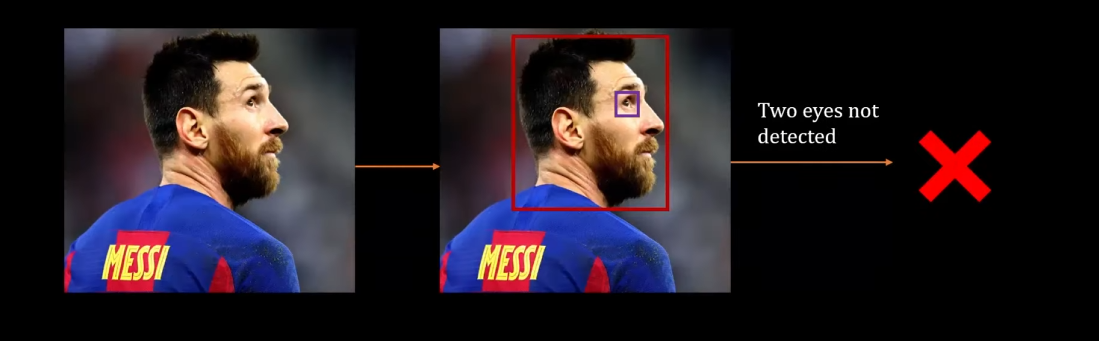

## the case studies and rectification data

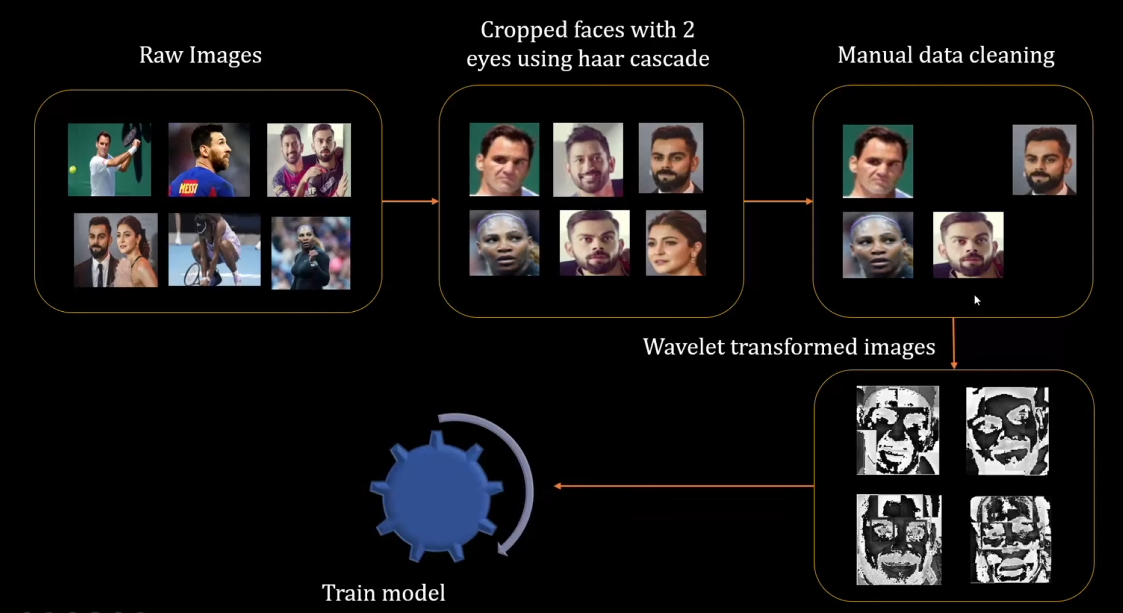


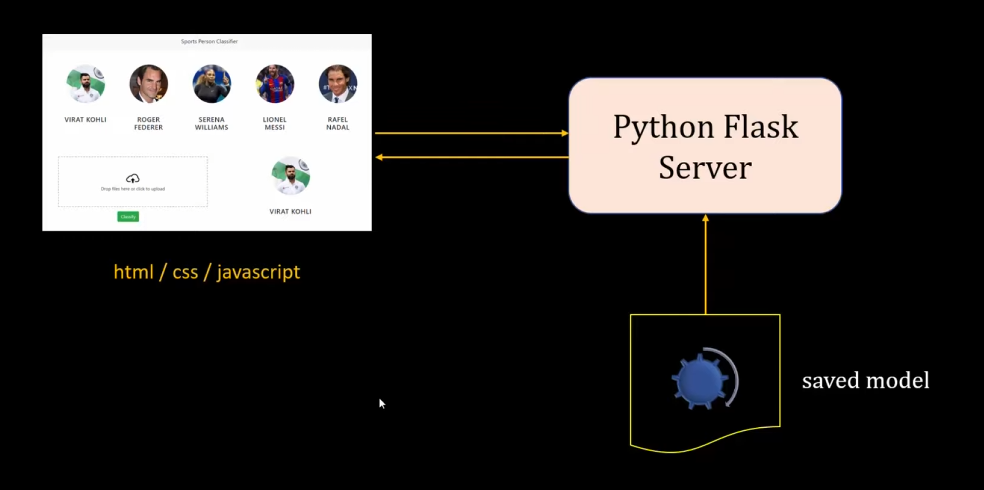

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
img = cv2.imread('./test_img/sharapova1.jpg')
img.shape

(739, 962, 3)

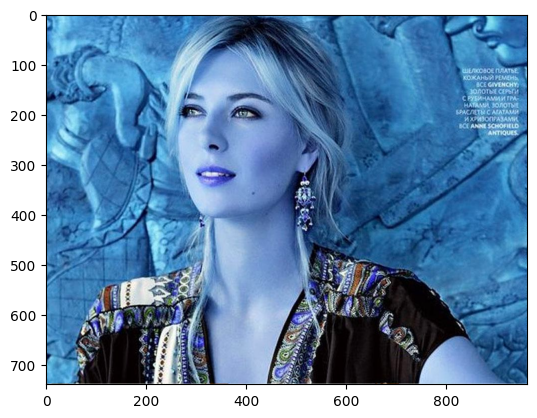

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(739, 962)

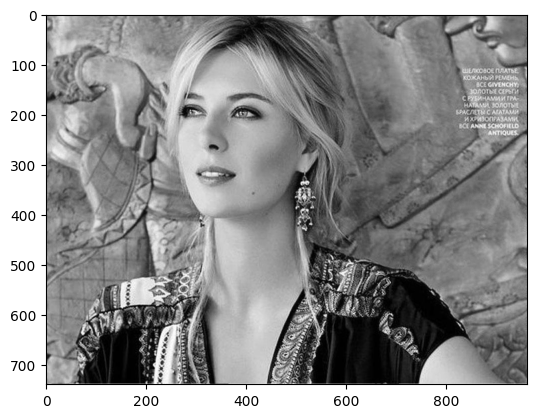

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[182,  69, 331, 331]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(182, 69, 331, 331)

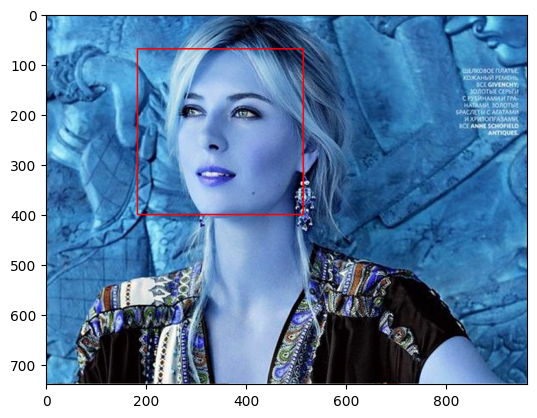

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

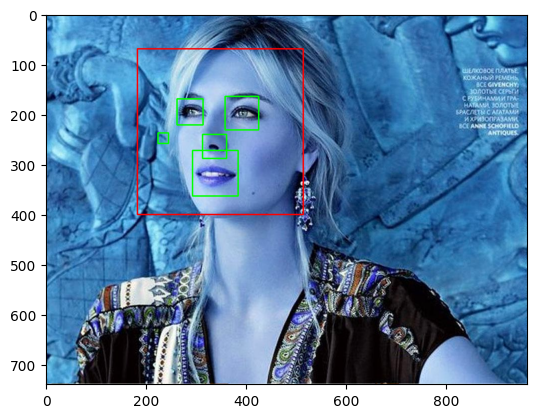

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

## roi : Region of interest

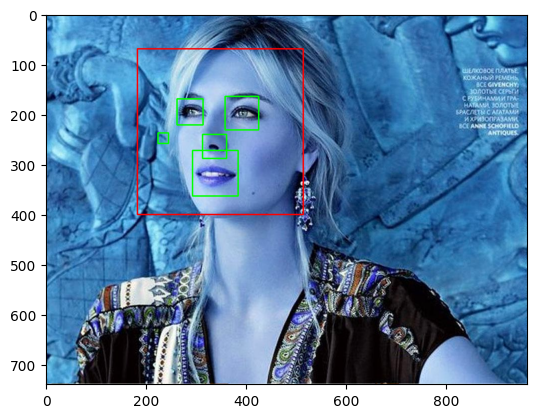

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

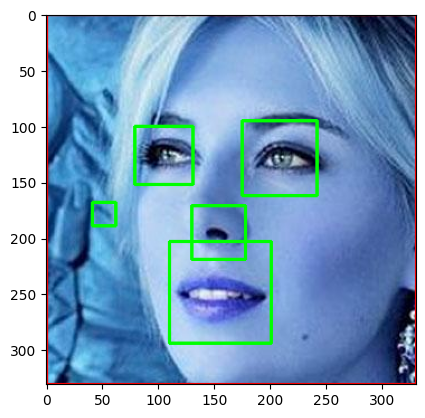

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

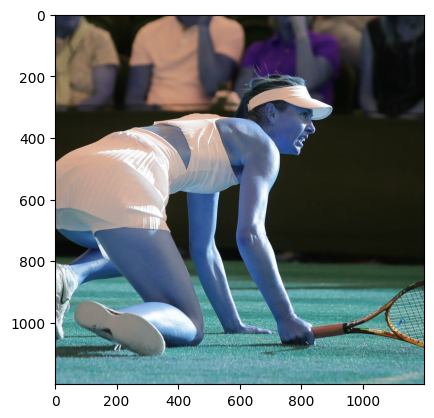

In [14]:
original_image = cv2.imread('./test_img/sharapova2.jpg')
plt.imshow(original_image)

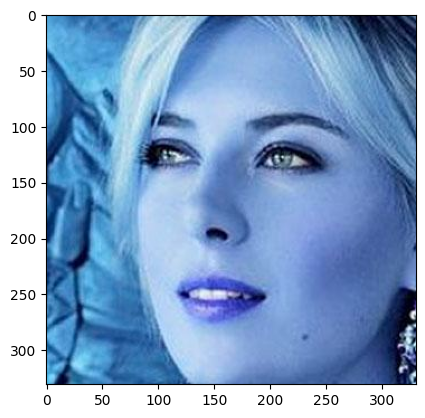

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_img/sharapova1.jpg')
plt.imshow(cropped_image)

In [16]:
cropped_image_no_eyes_2 = get_cropped_image_if_2_eyes('./test_img/sharapova2.jpg')
cropped_image_no_eyes_2

In [17]:
path_to_data = './images_dataset'
path_to_cr_data = './images_dataset/cropped/'

In [58]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [59]:
img_dirs

['./images_dataset\\lionel_messi',
 './images_dataset\\maria_sharapova',
 './images_dataset\\roger_federer',
 './images_dataset\\serena_williams',
 './images_dataset\\virat_kohli']

In [60]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [61]:
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/' and '\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) +".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            

lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


## Wavelet

In [26]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

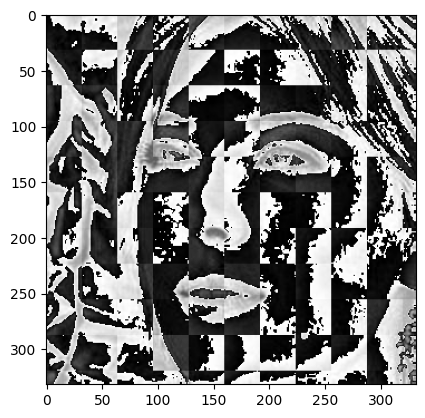

In [27]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [73]:
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi/lionel_messi1.png',
  './images_dataset/cropped/lionel_messi/lionel_messi2.png',
  './images_dataset/cropped/lionel_messi/lionel_messi3.png',
  './images_dataset/cropped/lionel_messi/lionel_messi4.png',
  './images_dataset/cropped/lionel_messi/lionel_messi5.png',
  './images_dataset/cropped/lionel_messi/lionel_messi6.png',
  './images_dataset/cropped/lionel_messi/lionel_messi7.png',
  './images_dataset/cropped/lionel_messi/lionel_messi8.png',
  './images_dataset/cropped/lionel_messi/lionel_messi9.png',
  './images_dataset/cropped/lionel_messi/lionel_messi10.png',
  './images_dataset/cropped/lionel_messi/lionel_messi11.png',
  './images_dataset/cropped/lionel_messi/lionel_messi12.png',
  './images_dataset/cropped/lionel_messi/lionel_messi13.png',
  './images_dataset/cropped/lionel_messi/lionel_messi14.png',
  './images_dataset/cropped/lionel_messi/lionel_messi15.png',
  './images_dataset/cropped/lionel_messi/lionel_messi16.png',
 

In [74]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [75]:
X = []
y = []

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [78]:
32*32*3 + 32*32

4096

In [79]:
len(X[0])

4096

In [81]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(165, 4096)

### SVM for classification

In [82]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'sigmoid',C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8571428571428571

In [94]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.60      0.75        10
           2       0.78      1.00      0.88         7
           3       0.57      1.00      0.73         4
           4       0.92      0.85      0.88        13

    accuracy                           0.86        42
   macro avg       0.85      0.89      0.85        42
weighted avg       0.90      0.86      0.86        42



## grid search cv

In [95]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [96]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [97]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\djgop\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\djgop\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\djgop\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\djgop\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWar

model  ...                                   best_params
0                  svm  ...        {'svc__C': 1, 'svc__kernel': 'linear'}
1        random_forest  ...  {'randomforestclassifier__n_estimators': 10}
2  logistic_regression  ...                  {'logisticregression__C': 1}

[3 rows x 3 columns]

In [98]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [99]:
best_estimators['svm'].score(X_test,y_test)

0.8809523809523809

In [100]:
best_estimators['random_forest'].score(X_test,y_test)

0.7619047619047619

In [102]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9047619047619048

In [105]:
best_clf = best_estimators['svm']

In [106]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  1,  0],
       [ 1,  8,  1,  0,  0],
       [ 0,  0,  7,  0,  0],
       [ 0,  0,  1,  3,  0],
       [ 0,  0,  1,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

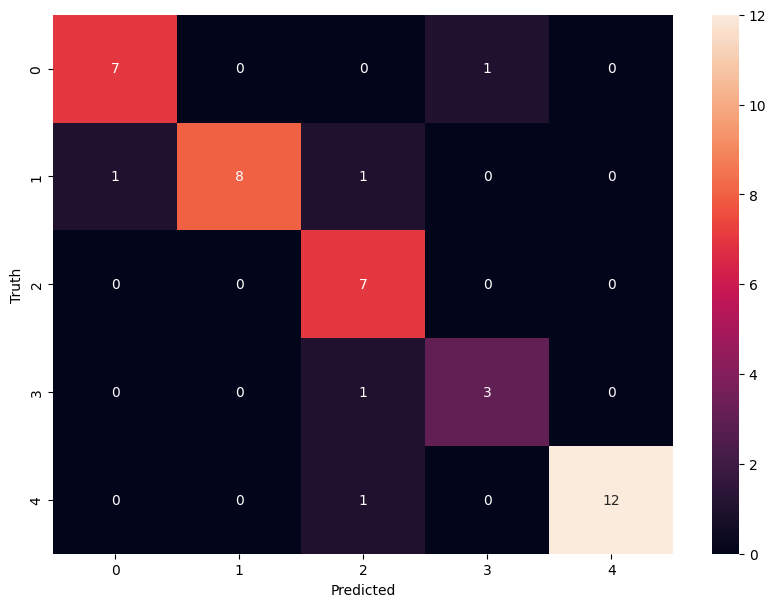

In [107]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Save the model using joblib

In [108]:
import joblib

joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

## save as dictionary

In [109]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))